# Fake News Detection

<a><img src="fake-news.jpg"></a>

## Problem Statement :
    To make a model which is able to determine if an article is fake news or not.
    
## About Fake News :
        Fake news in India refers to misinformation or disinformation in the country which is spread through word of mouth and traditional media and more recently through digital forms of communication such as edited videos, memes, unverified advertisements and social media propagated rumours. Fake news spread through social media in the country has become a serious problem, with the potential of it resulting in mob violence, as was the case where at least 20 people were killed in 2018 as a result of misinformation circulated on social media.
        
## Task :
    We have to build a Deep Learning model using Natural Language Processing [NLP] technique to classify whether the news/article is fake or not.
    
## About Dataset :
    The dataset containing 2 files :
        Fake.csv : Contains total of 23481 fake news entries
        True.csv : Contains total of 21417 real/true news entries 
        
    Both files consists of parameters such as :
        
        1) title : The title of the article.
        2) text : The text of the article.
        3) subject : The subject of the article.
        4) date : The date at which the article was posted.
        
#### Dataset Link : https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset

### Mounting drive on Google Colab

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


### Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re 
from wordcloud import WordCloud

In [3]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPooling1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score , confusion_matrix

### Exploring Fake News

In [5]:
fake = pd.read_csv(r"/content/drive/MyDrive/Fake_News_Detection/Dataset/Fake.csv")
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [7]:
fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [8]:
fake.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [9]:
fake['subject'].value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

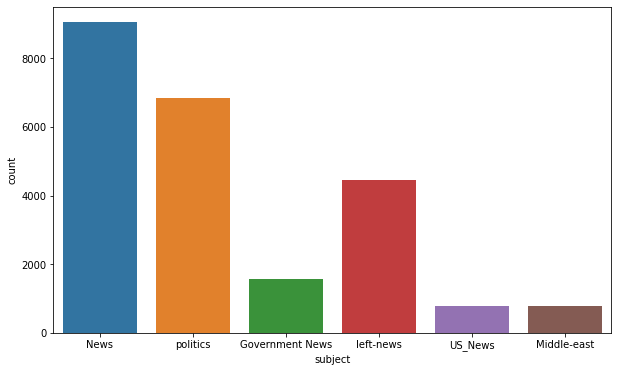

In [10]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'subject' , data=fake)

### Word Cloud

In [11]:
fake['text']

0        Donald Trump just couldn t wish all Americans ...
1        House Intelligence Committee Chairman Devin Nu...
2        On Friday, it was revealed that former Milwauk...
3        On Christmas day, Donald Trump announced that ...
4        Pope Francis used his annual Christmas Day mes...
                               ...                        
23476    21st Century Wire says As 21WIRE reported earl...
23477    21st Century Wire says It s a familiar theme. ...
23478    Patrick Henningsen  21st Century WireRemember ...
23479    21st Century Wire says Al Jazeera America will...
23480    21st Century Wire says As 21WIRE predicted in ...
Name: text, Length: 23481, dtype: object

In [13]:
fake['text'].tolist()

Output hidden; open in https://colab.research.google.com to view.

In [14]:
type(fake['text'].tolist())

list

In [15]:
text = ' '.join(fake['text'].tolist()) # list data convert into single string

In [16]:
type(text)

str

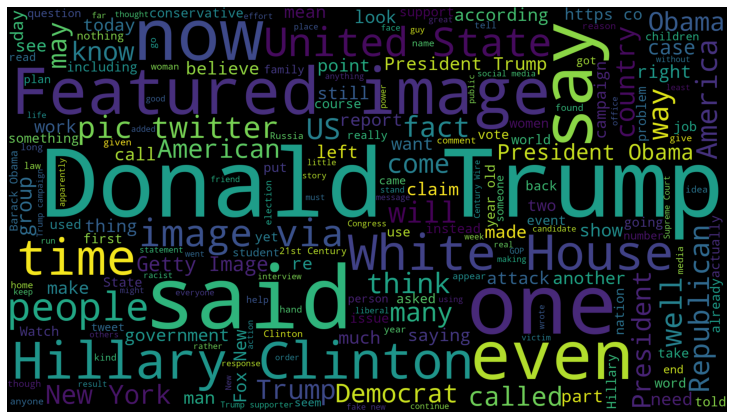

In [17]:
wordcloud = WordCloud(width=1920 , height=1080).generate(text)
fig = plt.figure(figsize = (10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### Exploring Real News

In [18]:
real = pd.read_csv(r"/content/drive/MyDrive/Fake_News_Detection/Dataset/True.csv")
real.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [19]:
real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [20]:
real['subject'].value_counts()

politicsNews    11272
worldnews       10145
Name: subject, dtype: int64

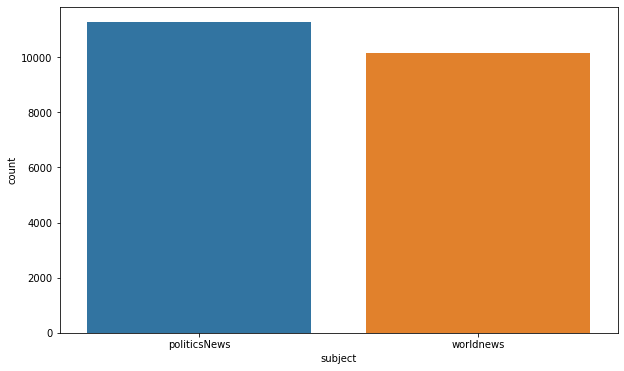

In [21]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'subject' , data=real)

### Word Cloud

In [22]:
text = ' '.join(real['text'].tolist()) # list data convert into single string

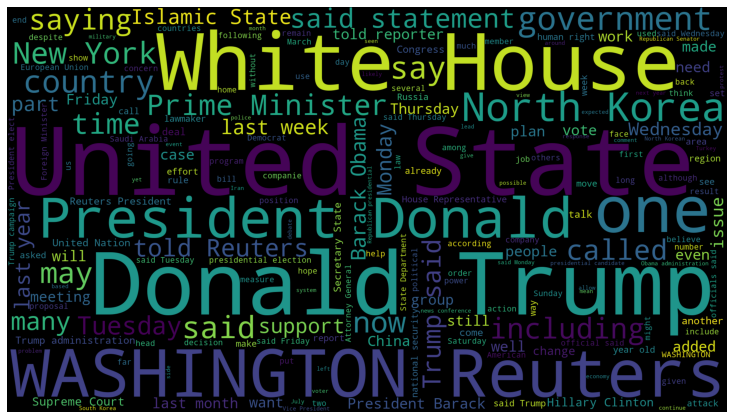

In [23]:
wordcloud = WordCloud(width=1920 , height=1080).generate(text)
fig = plt.figure(figsize = (10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### Dropping rows having missing information

In [24]:
unknown_publishers = []

for index, row in enumerate(real.text.values):
    try:
        record = row.split('-' , maxsplit = 1)
        record[1]
        
        assert(len(record[0]) < 120)
    except:
        unknown_publishers.append(index)

In [25]:
len(unknown_publishers)

222

In [26]:
real.iloc[unknown_publishers]

,title,text,subject,date
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
12,Factbox: Trump on Twitter (Dec 28) - Vanity Fa...,The following statements were posted to the ve...,politicsNews,"December 28, 2017"
13,"Trump on Twitter (Dec 27) - Trump, Iraq, Syria",The following statements were posted to the ve...,politicsNews,"December 28, 2017"
14,Man says he delivered manure to Mnuchin to pro...,"(In Dec. 25 story, in second paragraph, corre...",politicsNews,"December 25, 2017"
...,...,...,...,...
20135,China's big money trumps U.S. influence in Cam...,(Story corrects to million from billion in pa...,worldnews,"September 11, 2017"
20500,UK publisher rejected request to block academi...,"(This Sept 8 story corrects headline, clarifi...",worldnews,"September 8, 2017"
20667,Rohingya say their village is lost to Myanmar'...,"(Story refiles to add dropped word not , in ...",worldnews,"September 7, 2017"
21246,'Gates of Hell': Iraqi army says fighting near...,(Story corrects third paragraph to show Mosul...,worldnews,"August 29, 2017"


In [27]:
real.iloc[8970]

title      Graphic: Supreme Court roundup
text                                     
subject                      politicsNews
date                       June 16, 2016 
Name: 8970, dtype: object

In [28]:
real.drop(8970 , axis = 0)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [29]:
real.iloc[unknown_publishers].text

7        The following statements were posted to the ve...
8        The following statements were posted to the ve...
12       The following statements were posted to the ve...
13       The following statements were posted to the ve...
14        (In Dec. 25 story, in second paragraph, corre...
                               ...                        
20135     (Story corrects to million from billion in pa...
20500     (This Sept 8 story corrects headline, clarifi...
20667     (Story refiles to add dropped word  not , in ...
21246     (Story corrects third paragraph to show Mosul...
21339     (Story corrects to fix spelling in paragraph ...
Name: text, Length: 222, dtype: object

In [30]:
publisher = []
tmp_text = []

for index, row in enumerate(real.text.values):
    if index in unknown_publishers:
        tmp_text.append(row)
        publisher.append('Unknown')
    else:
        record = row.split('-' , maxsplit = 1)
        publisher.append(record[0].strip())
        tmp_text.append(record[1].strip())
    

In [31]:
real['publisher'] = publisher
real['text'] = tmp_text

In [32]:
real.head()

,title,text,subject,date,publisher
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction ...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fir...,politicsNews,"December 29, 2017",WASHINGTON (Reuters)
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links bet...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos tol...,politicsNews,"December 30, 2017",WASHINGTON (Reuters)
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Post...,politicsNews,"December 29, 2017",SEATTLE/WASHINGTON (Reuters)


In [33]:
empty_fake_index = [index for index,text in enumerate(fake.text.tolist()) if str(text).strip() == ""]

In [34]:
fake.iloc[empty_fake_index]

,title,text,subject,date
10923,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017"
11041,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017"
11190,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,"Apr 6, 2017"
11225,MAYOR OF SANCTUARY CITY: Trump Trying To Make ...,,politics,"Apr 2, 2017"
11236,SHOCKER: Public School Turns Computer Lab Into...,,politics,"Apr 1, 2017"
...,...,...,...,...
21816,BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...,,left-news,"Apr 27, 2015"
21826,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,,left-news,"Apr 25, 2015"
21827,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,left-news,"Apr 25, 2015"
21857,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,left-news,"Apr 14, 2015"


In [35]:
real['text'] = real['title'] + " " + real['text']
fake['text'] = fake['title'] + " " + fake['text']

In [36]:
real['text'] = real['text'].apply(lambda x: str(x).lower())
fake['text'] = fake['text'].apply(lambda x: str(x).lower())

### Preprocessing Text

In [37]:
real['class'] = 1
fake['class'] = 0

In [38]:
print(real.columns)
print(fake.columns)

Index(['title', 'text', 'subject', 'date', 'publisher', 'class'], dtype='object')
Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')


In [39]:
real = real[['text' , 'class']]
fake = fake[['text' , 'class']]

### Combining File
    data = (real/true news data) + (fake news)

In [40]:
data = real.append(fake, ignore_index = True)
data

,text,class
0,"as u.s. budget fight looms, republicans flip t...",1
1,u.s. military to accept transgender recruits o...,1
2,senior u.s. republican senator: 'let mr. muell...,1
3,fbi russia probe helped by australian diplomat...,1
4,trump wants postal service to charge 'much mor...,1
...,...,...
44893,mcpain: john mccain furious that iran treated ...,0
44894,justice? yahoo settles e-mail privacy class-ac...,0
44895,sunnistan: us and allied ‘safe zone’ plan to t...,0
44896,how to blow $700 million: al jazeera america f...,0


### Shuffling Combined data

In [41]:
data = data.sample(frac = 1 , random_state=42)
data

,text,class
22216,breaking: gop chairman grassley has had enoug...,0
27917,failed gop candidates remembered in hilarious...,0
25007,mike pence’s new dc neighbors are hilariously...,0
1377,california ag pledges to defend birth control ...,1
32476,az ranchers living on us-mexico border destroy...,0
...,...,...
11284,nigeria says u.s. agrees delayed $593 million ...,1
44732,boiler room #62 – fatal illusions tune in to t...,0
38158,atheists sue governor of texas over display on...,0
860,republican tax plan would deal financial hit t...,1


In [ ]:
#!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

In [43]:
import preprocess_kgptalkie as ps

In [44]:
data['text'] = data['text'].apply(lambda x: ps.remove_special_chars(x))

### Vectorization : Word2Vec

In [45]:
data.head() # word to numerical

,text,class
22216,breaking gop chairman grassley has had enough ...,0
27917,failed gop candidates remembered in hilarious ...,0
25007,mike pences new dc neighbors are hilariously t...,0
1377,california ag pledges to defend birth control ...,1
32476,az ranchers living on usmexico border destroy ...,0


In [46]:
import gensim

In [47]:
y = data['class'].values

In [48]:
X = [d.split() for d in data['text'].tolist()]
X

Output hidden; open in https://colab.research.google.com to view.

In [49]:
print(X[0])
print(X[1])
print(type(X))
print(type(X[0]))

['breaking', 'gop', 'chairman', 'grassley', 'has', 'had', 'enough', 'demands', 'trump', 'jr', 'testimony', 'donald', 'trump', 's', 'white', 'house', 'is', 'in', 'chaos', 'and', 'they', 'are', 'trying', 'to', 'cover', 'it', 'up', 'their', 'russia', 'problems', 'are', 'mounting', 'by', 'the', 'hour', 'and', 'they', 'refuse', 'to', 'acknowledge', 'that', 'there', 'are', 'problems', 'surrounding', 'all', 'of', 'this', 'to', 'them', 'it', 's', 'fake', 'news', 'or', 'a', 'hoax', 'however', 'the', 'facts', 'bear', 'things', 'out', 'differently', 'and', 'it', 'seems', 'that', 'there', 'are', 'now', 'cracks', 'in', 'the', 'congressional', 'public', 'leadershipchuck', 'grassley', 'riowa', 'who', 'heads', 'the', 'senate', 'judiciary', 'committee', 'is', 'fed', 'up', 'he', 'is', 'now', 'demanding', 'that', 'donald', 'trump', 'jr', 'and', 'former', '2016', 'trump', 'campaign', 'manager', 'paul', 'manafort', 'testify', 'before', 'his', 'committee', 'regarding', 'the', 'now', 'infamous', 'shady', 'me

In [51]:
DIM = 100 # word converted in sequence of 100 vector
w2v_model = gensim.models.Word2Vec(sentences = X , size=DIM , window=10 , min_count = 1)

In [52]:
w2v_model.wv.vectors.shape

(231911, 100)

In [53]:
w2v_model.wv['love']

array([-1.6287324 ,  3.3060625 ,  0.48185253,  0.34447178, -1.0390452 ,
       -0.56735146,  0.5444069 , -2.0215268 ,  1.5874214 ,  5.1161575 ,
       -0.18891928, -1.3638048 ,  0.85369563,  2.689768  , -0.7508993 ,
       -0.04761927,  2.6400719 ,  1.9160482 , -5.600419  , -1.7517256 ,
        2.7624755 ,  2.1676912 , -3.2073765 ,  1.3874512 ,  3.8797197 ,
        4.5142074 , -0.5066413 , -1.121247  ,  0.50160074,  0.37167126,
        2.0313091 ,  1.0885359 , -1.8752793 ,  1.7399834 ,  2.4694164 ,
        3.7111344 ,  0.70479983, -2.8814895 ,  1.8965875 , -1.2171471 ,
        1.3142829 , -2.1845965 , -2.1942692 , -0.41868988,  1.2732835 ,
       -0.25956988,  1.2550305 ,  0.07360248,  0.7364301 ,  4.64169   ,
       -0.8119735 ,  0.7240306 , -2.5329921 ,  2.9129694 , -3.2583187 ,
       -1.0963681 , -3.14511   ,  0.10456236,  2.9095163 ,  2.0882428 ,
        1.0405103 ,  1.4409609 , -0.97996926, -1.6991098 , -0.6002757 ,
        0.27272227,  2.2489796 , -0.01466027,  0.97748333, -2.13

In [54]:
w2v_model.wv['india']

array([-1.4091146 ,  1.301195  ,  4.073906  , -0.803409  ,  1.2970711 ,
       -0.54801947,  2.5167723 , -1.918887  ,  1.2375877 , -1.2657068 ,
        1.8622346 , -1.5910822 ,  0.2313657 , -2.936934  , -3.7486792 ,
       -0.20712705,  0.66262716, -2.6053593 ,  0.6583481 ,  0.37415323,
       -1.2368156 , -2.031231  ,  0.5846004 ,  1.0741286 , -2.7850633 ,
        1.6672432 , -1.773581  ,  0.9220101 , -3.9395905 , -0.99664396,
       -1.7930382 , -2.8258536 , -0.6562725 , -2.1652029 , -0.38206315,
       -1.715109  ,  1.192131  ,  0.224447  , -1.0141487 , -3.2091918 ,
       -0.62771505, -2.6424978 , -0.01376309, -0.59063363,  0.5764091 ,
       -0.39951673, -0.65953493, -0.9999445 , -0.54017484,  0.21260615,
       -2.7774396 , -1.1333275 , -0.30344853,  3.5454738 ,  0.5627945 ,
        1.5983113 , -0.6813271 ,  2.565179  , -0.75166094, -2.3275871 ,
       -1.835042  , -0.902203  , -1.528282  , -0.42824045, -4.4598703 ,
       -0.09708518, -3.356227  ,  2.716382  , -2.273249  ,  1.10

In [55]:
w2v_model.wv.most_similar('india') # word getting frequent with india article

[('pakistan', 0.7978940010070801),
 ('malaysia', 0.7818710207939148),
 ('gwadar', 0.7290103435516357),
 ('thailand', 0.7136421203613281),
 ('indonesia', 0.6975665092468262),
 ('philippines', 0.681427538394928),
 ('singapore', 0.67158043384552),
 ('china', 0.6647745370864868),
 ('djibouti', 0.6643491983413696),
 ('modi', 0.6597554683685303)]

In [56]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

In [57]:
X = tokenizer.texts_to_sequences(X)

In [58]:
len(tokenizer.word_index)

231911

In [59]:
[len(x) for x in X]

[372,
 503,
 393,
 93,
 157,
 867,
 167,
 573,
 36,
 504,
 462,
 198,
 461,
 1436,
 719,
 407,
 1039,
 351,
 93,
 17,
 407,
 348,
 429,
 583,
 4,
 380,
 241,
 415,
 290,
 294,
 223,
 216,
 86,
 301,
 489,
 428,
 657,
 798,
 508,
 365,
 226,
 668,
 741,
 207,
 646,
 559,
 346,
 95,
 398,
 277,
 78,
 131,
 478,
 23,
 260,
 249,
 421,
 52,
 327,
 528,
 1166,
 580,
 442,
 344,
 382,
 180,
 477,
 351,
 96,
 1225,
 201,
 22,
 394,
 217,
 580,
 327,
 364,
 245,
 564,
 675,
 360,
 95,
 424,
 443,
 112,
 150,
 375,
 821,
 1077,
 530,
 396,
 340,
 116,
 783,
 297,
 379,
 600,
 191,
 530,
 90,
 306,
 200,
 279,
 344,
 164,
 411,
 582,
 268,
 829,
 320,
 151,
 182,
 290,
 641,
 410,
 523,
 356,
 260,
 466,
 525,
 643,
 411,
 351,
 148,
 12,
 866,
 400,
 582,
 383,
 465,
 383,
 596,
 335,
 48,
 366,
 1212,
 465,
 79,
 470,
 45,
 146,
 284,
 752,
 232,
 897,
 370,
 96,
 254,
 502,
 269,
 345,
 317,
 55,
 368,
 489,
 600,
 140,
 369,
 432,
 98,
 146,
 151,
 642,
 110,
 561,
 229,
 415,
 807,
 89,
 73

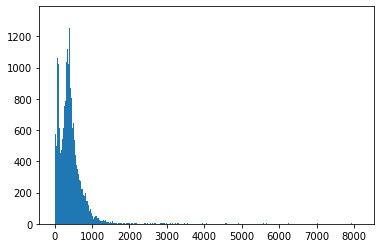

In [60]:
plt.hist([len(x) for x in X] , bins = 700)
plt.show()

In [61]:
nos = np.array([len(x) for x in X])
len(nos[nos>1000])

1584

In [62]:
maxlen = 1000
X = pad_sequences(X , maxlen = maxlen)

In [63]:
len(X[1023])

1000

In [64]:
vocab_size = len(tokenizer.word_index) + 1

In [65]:
vocab = tokenizer.word_index

In [66]:
def get_weight_matrix(model):
    weight_matrix = np.zeros((vocab_size , DIM))
    
    for word, i in vocab.items():
        weight_matrix[i] = model.wv[word]
        
    return weight_matrix

In [67]:
embedding_vectors = get_weight_matrix(w2v_model)

In [68]:
embedding_vectors.shape

(231912, 100)

### Building Model using LSTM

In [69]:
model = Sequential()
model.add(Embedding(vocab_size , output_dim = DIM, weights = [embedding_vectors], input_length = maxlen, trainable = False ))
model.add(LSTM(units = 128))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam' , loss = 'binary_crossentropy' , metrics = ['acc'])

In [70]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1000, 100)         23191200  
_________________________________________________________________
lstm (LSTM)                  (None, 128)               117248    
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 23,308,577
Trainable params: 117,377
Non-trainable params: 23,191,200
_________________________________________________________________


In [71]:
X_train, X_test , y_train, y_test = train_test_split(X,y)

In [72]:
model.fit(X_train, y_train, validation_split = 0.3, epochs = 6)

Epoch 1/6
737/737 [==============================] - 45s 50ms/step - loss: 0.1460 - acc: 0.9461 - val_loss: 0.1391 - val_acc: 0.9476
Epoch 2/6
737/737 [==============================] - 36s 49ms/step - loss: 0.0908 - acc: 0.9706 - val_loss: 0.2898 - val_acc: 0.8605
Epoch 3/6
737/737 [==============================] - 36s 49ms/step - loss: 0.0726 - acc: 0.9745 - val_loss: 0.0327 - val_acc: 0.9908
Epoch 4/6
737/737 [==============================] - 36s 49ms/step - loss: 0.0288 - acc: 0.9912 - val_loss: 0.0634 - val_acc: 0.9764
Epoch 5/6
737/737 [==============================] - 36s 49ms/step - loss: 0.0257 - acc: 0.9917 - val_loss: 0.0243 - val_acc: 0.9930
Epoch 6/6
737/737 [==============================] - 36s 49ms/step - loss: 0.0185 - acc: 0.9941 - val_loss: 0.0133 - val_acc: 0.9951


In [73]:
y_pred = (model.predict(X_test) > 0.5).astype(int)

### Evaluation Metrics

In [74]:
accuracy_score(y_test , y_pred)

0.9933184855233853

In [75]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5874
           1       0.99      0.99      0.99      5351

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



In [76]:
print(confusion_matrix(y_test, y_pred))

[[5834   40]
 [  35 5316]]


### Saving Model

In [78]:
model.save('/content/drive/MyDrive/Fake_News_Detection/fake_news_detection.h5')

### Testing Model
    [0] - Fake news
    [1] - Real/True news

In [79]:
x = ['this is a real news']
x = tokenizer.texts_to_sequences(x)
x = pad_sequences(x, maxlen = maxlen)
(model.predict(x) >= 0.5).astype(int)

array([[0]])